In [20]:
# ===================================================================
# 共通セットアップセル (ローカル / Colab 共通)
# ===================================================================
import sys
import os
from pathlib import Path

# --- 1. 環境判別 ---
IN_COLAB = False
try:
    # Colab環境でのみインポートが成功する
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    pass # ローカル環境


if IN_COLAB:
    # ==================================
    # Colab 環境でのセットアップ
    # ==================================
    print("環境: Colab を検出。セットアップを開始します。")

    # 1. Google Driveのマウント
    drive.mount('/content/drive')

    # 2. GitHubリポジトリのクローンまたはプル
    repo_path = Path('/content/braidyn-bc')
    if repo_path.exists():
        print("リポジトリを pull します...")
        os.chdir(repo_path)
        !git pull
    else:
        print("リポジトリを clone します...")
        !git clone https://github.com/nyaamikeneko/braidyn-bc.git
        os.chdir(repo_path)

    # 3. 依存ライブラリのインストール
    print("依存ライブラリをインストールします...")
    !pip install -q pynwb git+https://github.com/BraiDyn-BC/bdbc-nwb-explorer.git

    # 4. sys.path の設定
    project_root = repo_path
    if str(project_root) not in sys.path:
        sys.path.append(str(project_root))

    print(f"セットアップ完了。プロジェクトルート: {project_root}")

else:
    # ==================================
    # ローカル (VSCode) 環境でのセットアップ
    # ==================================
    print("環境: ローカル (VSCode) を検出。")

    # 1. sys.path の設定
    current_dir = Path.cwd()
    if current_dir.name == 'notebooks':
        # ノートブックが notebooks/ から実行された場合
        project_root = current_dir.parent
    else:
        # プロジェクトルート (braidyn-bc/) から実行されたと仮定
        project_root = current_dir

    if str(project_root) not in sys.path:
        sys.path.append(str(project_root))

    print(f"プロジェクトルート: {project_root}")

# ===================================================================
# 共通インポート・処理
# (セットアップが完了したため、config.py や src/ が読み込める)
# ===================================================================
print("\n共通モジュールをインポートします...")

import bdbc_nwb_explorer as nwbx
import src.data_loader as dl
import config  # config.py もここで読み込める

print(f"データパス (DATA_NWB_ROOT): {config.DATA_NWB_ROOT}")

環境: Colab を検出。セットアップを開始します。
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
リポジトリを pull します...
Already up to date.
依存ライブラリをインストールします...
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
セットアップ完了。プロジェクトルート: /content/braidyn-bc

共通モジュールをインポートします...
データパス (DATA_NWB_ROOT): /content/drive/MyDrive/braidyn-bc/data


In [ ]:
# --- 必要なデータを関数で読み出す ---
SESSION_ID = "VG1GC-66"
NWB_FILENAME = "VG1GC-66_2023-09-08_task-day15.nwb"
TASK_DAY_DIR = "task-day15"

# NWBデータの読み込み
# (dl は共通セルでインポート済み)
session = dl.load_nwb_session(SESSION_ID, NWB_FILENAME)

# CSVデータの読み込み
trials = dl.load_trials_csv(SESSION_ID, TASK_DAY_DIR)


--- 可視化 1: VG1GC-66 の Task Day ごとの時系列散布図 ---
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day1/trials_L1L2.csv
全試行数: 54000
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day2/trials_L1L2.csv
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day3/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day4/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day5/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day6/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day7/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day8/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day9/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day10/trials_L1L2.csv
全試行数: 54000
CSV読み込み中:

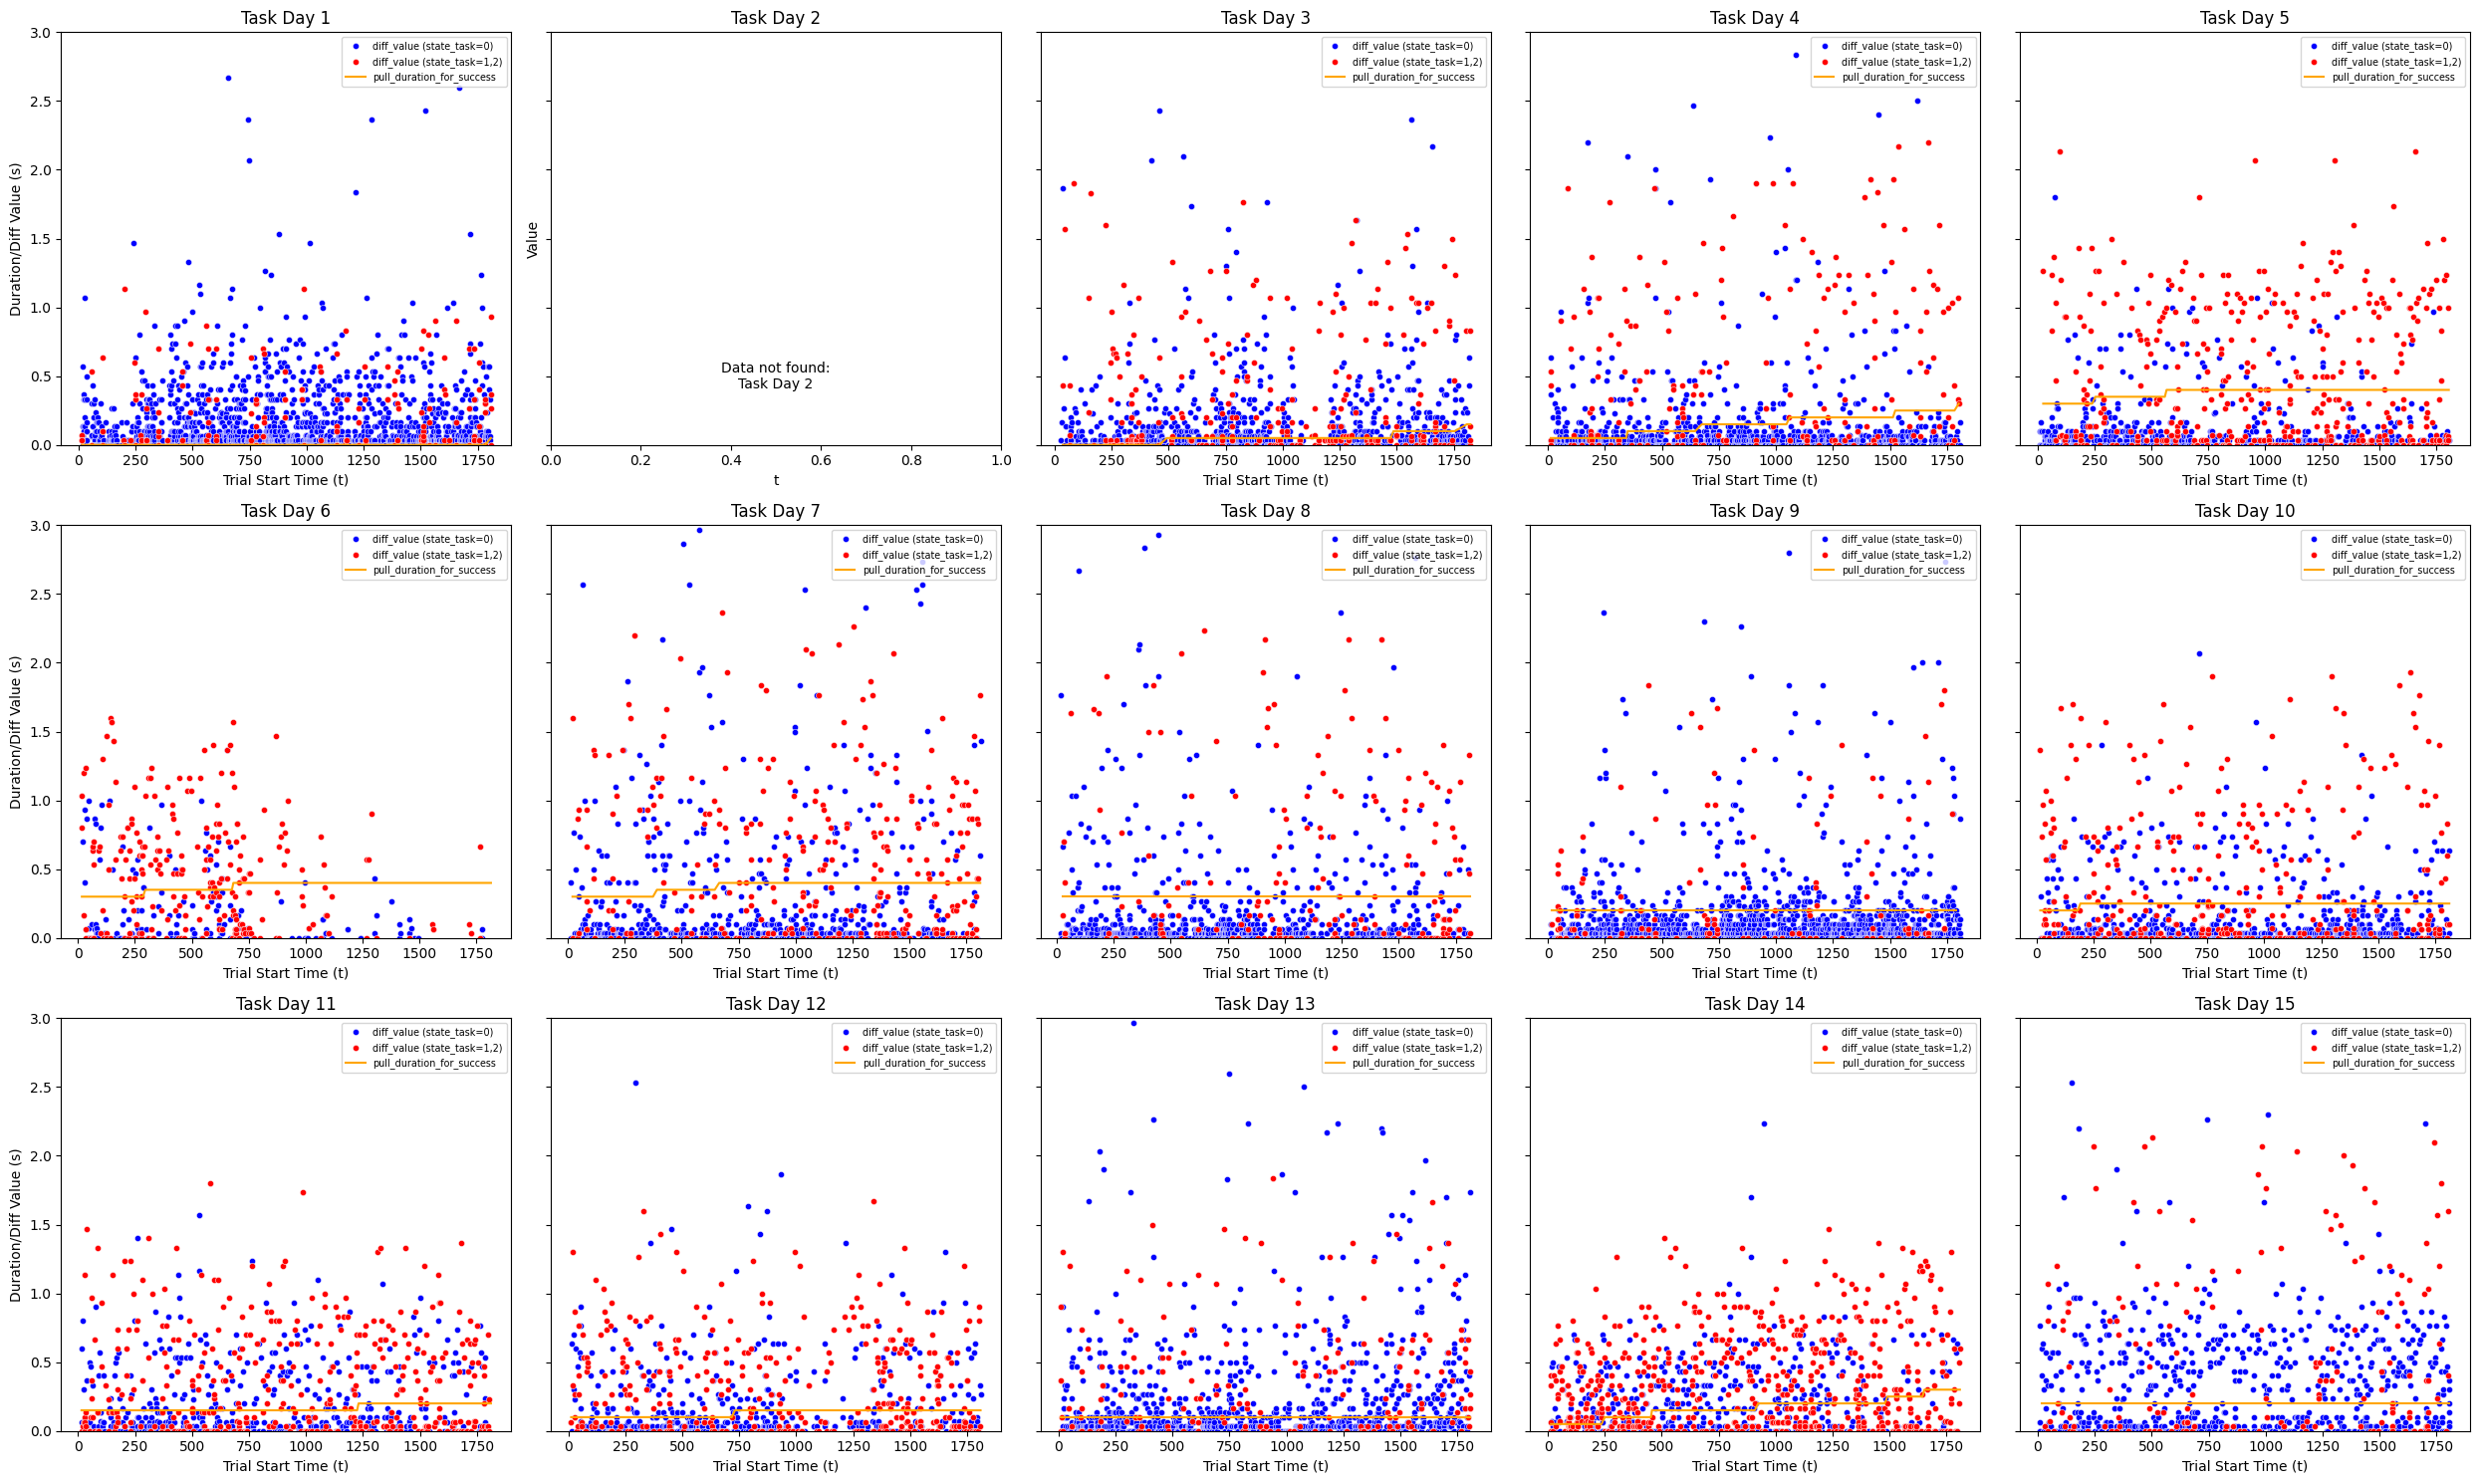

In [5]:
# --- 必要なモジュール ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# dl.load_trials_csv 関数が利用可能であることを前提とする

# --- 設定 ---
MOUSE_ID = "VG1GC-66"
THRESHOLD_UPPER = 3.0
Y_MIN, Y_MAX = 0, 3
NUM_DAYS = 15 # Task Day 1 から 15 まで

# --- 可視化 1: 時系列散布図の再現 (diff_value, pull_duration_for_success) ---

# 3行×5列のサブプロット作成（sharey=Trueで縦軸を揃える）
print(f"--- 可視化 1: {MOUSE_ID} の Task Day ごとの時系列散布図 ---")
fig_ts, axes_ts = plt.subplots(3, 5, figsize=(25, 15), sharey=True)
axes_ts = axes_ts.flatten()

for day in range(1, NUM_DAYS + 1):
    ax = axes_ts[day-1]
    TASK_DAY_DIR = f"task-day{day}"

    # 既存の読み込み関数 dl.load_trials_csv を使用
    # session ID は MOUSE_ID、TASK_DAY_DIR を使用
    df = dl.load_trials_csv(MOUSE_ID, TASK_DAY_DIR) # dl.load_trials_csvを呼び出す

    if df is None or df.empty:
        ax.text(0.5, 0.5, f"Data not found:\nTask Day {day}", ha='center', va='center')
        ax.set_title(f"Task Day {day}")
        ax.set_xlabel("t")
        ax.set_ylabel("Value")
        continue

    # diff_value: 閾値内 (< 3.0) のデータを抽出 (下限なし)
    df_diff = df[(df['diff_value'] < THRESHOLD_UPPER)]

    if 't' in df_diff.columns:
        # state_task==0 のデータ (青色)
        df_state0 = df_diff[df_diff['state_task'] == 0]
        # state_task==1,2 のデータ (赤色)
        df_state12 = df_diff[df_diff['state_task'].isin([1, 2])]

        # state_task==0 は青色の散布図
        sns.scatterplot(x='t', y='diff_value', data=df_state0, marker='o',
                        label='diff_value (state_task=0)', color='blue', ax=ax, s=20)
        # state_task==1,2 は赤色の散布図
        sns.scatterplot(x='t', y='diff_value', data=df_state12, marker='o',
                        label='diff_value (state_task=1,2)', color='red', ax=ax, s=20)

        # pull_duration_for_successが存在する場合はオレンジ色の線グラフ
        if 'pull_duration_for_success' in df.columns:
            sns.lineplot(x='t', y='pull_duration_for_success', data=df,
                         label='pull_duration_for_success', color='orange', ax=ax)

        ax.set_xlabel("Trial Start Time (t)")
        ax.set_ylabel("Duration/Diff Value (s)")
        ax.set_title(f"Task Day {day}")
        ax.set_ylim(Y_MIN, Y_MAX)
        ax.legend(fontsize='x-small', loc='upper right')
    else:
        ax.text(0.5, 0.5, "No 't' column", ha='center', va='center')
        ax.set_title(f"Task Day {day}")

plt.tight_layout()
plt.show()

--- 1. VG1GC-66 の Task Day ごとの diff_value データを収集中 ---
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day1/trials_L1L2.csv
全試行数: 54000
Task Day 1: 1956 データポイントをロードしました。
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day2/trials_L1L2.csv
Task Day 2: 必要なデータが見つからなかったためスキップします。
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day3/trials_L1L2.csv
全試行数: 54000
Task Day 3: 1199 データポイントをロードしました。
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day4/trials_L1L2.csv
全試行数: 54000
Task Day 4: 1226 データポイントをロードしました。
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day5/trials_L1L2.csv
全試行数: 54000
Task Day 5: 1019 データポイントをロードしました。
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day6/trials_L1L2.csv
全試行数: 54000
Task Day 6: 403 データポイントをロードしました。
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day7/trials_L1L2.csv
全試行数: 54000
Task Day 7: 1020 データポイントをロードしました。
CSV読み込み中: /content/drive/MyDrive/hackathon_da

/tmp/ipython-input-3511179911.py:82: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511179911.py:82: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511179911.py:82: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511179911.py:82: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511179911.py:82: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511179911.py:82: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3511179911.py:82: UserWarning: Glyph 12496 (\N{KATAKANA LETTER BA}) missing from font(s) DejaVu Sans.
  p

バイオリン図を diff_value_violinplot.png に保存しました。


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

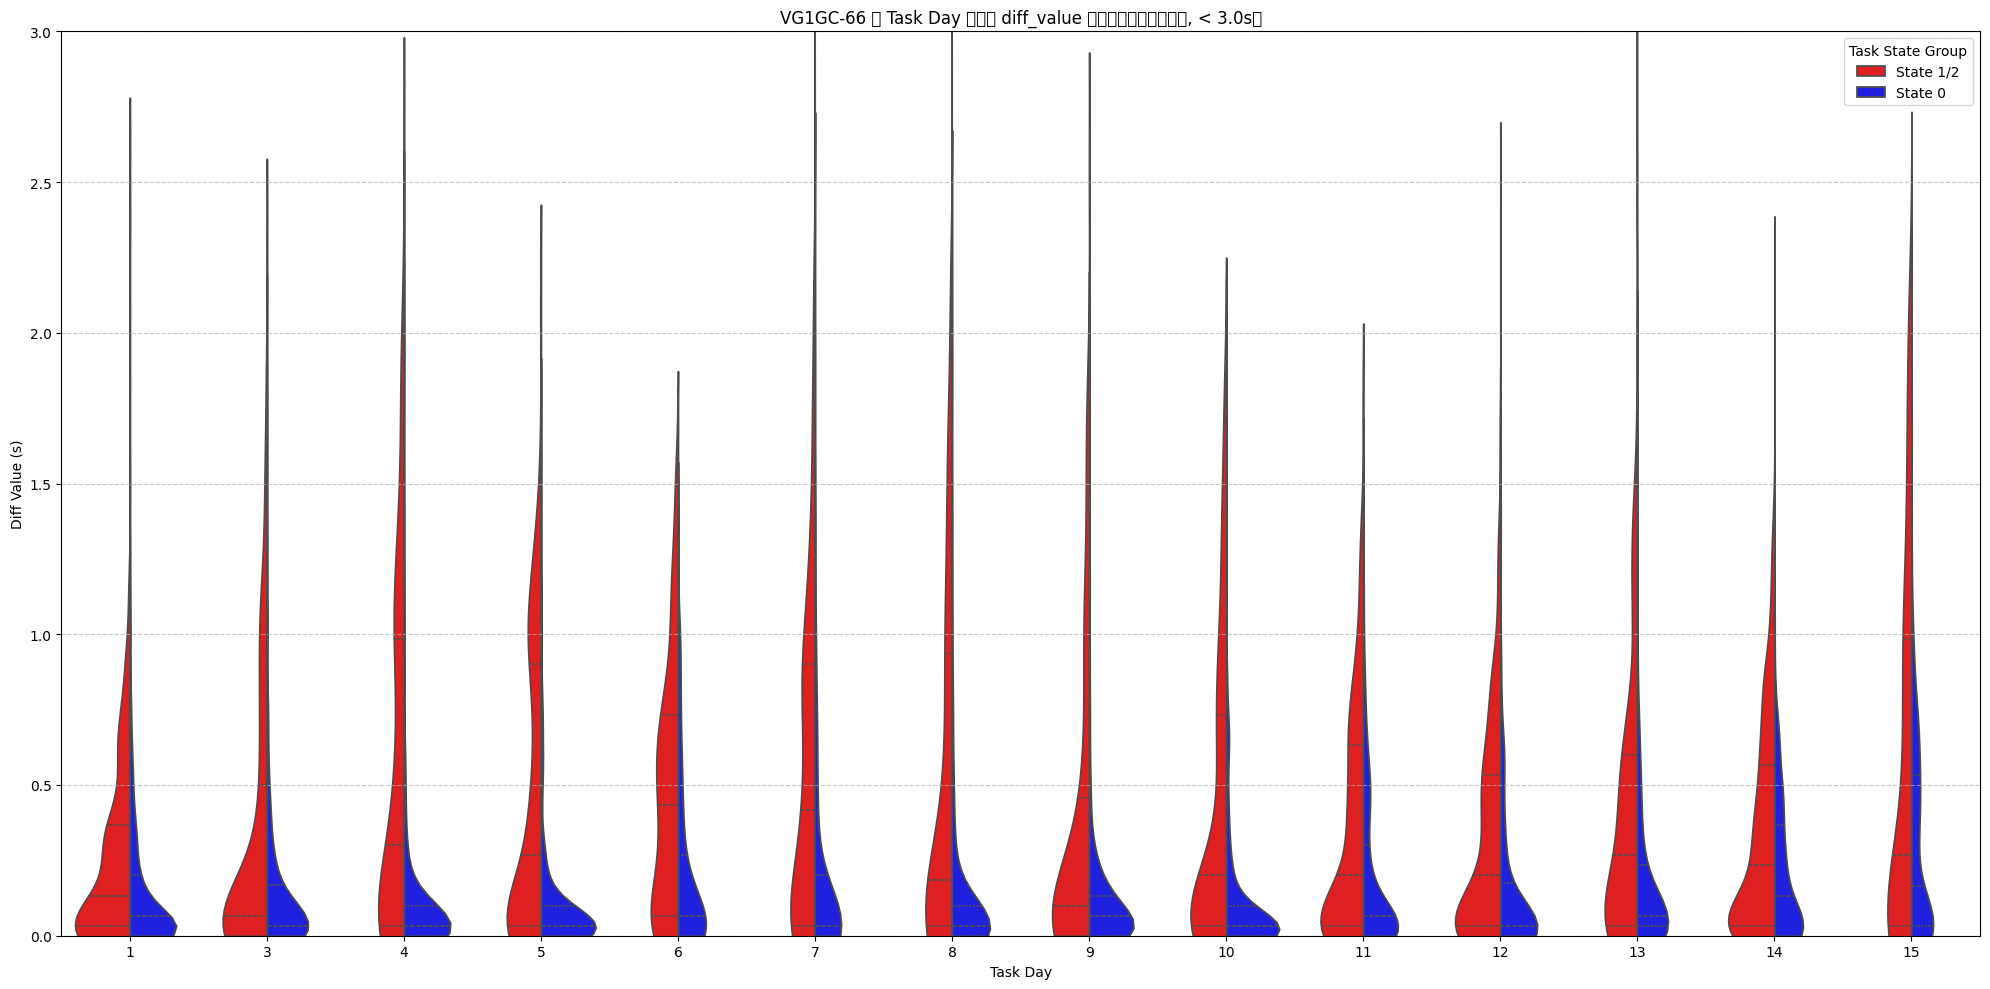

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# dl.load_trials_csv 関数が利用可能であることを前提とする

# --- 設定 ---
MOUSE_ID = "VG1GC-66"
DURATION_COL = 'diff_value' # Y軸のデータとして diff_value を使用
GROUP_COL = 'state_task' # グループ分けに使用するカラム
THRESHOLD_UPPER = 3.0 # 上限値（可視化コード1に合わせる）
Y_MIN, Y_MAX = 0, 3 # Y軸の表示範囲（秒）
NUM_DAYS = 15 # Task Day 1 から 15 まで

# --- 1. 全日分のデータを収集・結合 ---
print(f"--- 1. {MOUSE_ID} の Task Day ごとの diff_value データを収集中 ---")
all_data = []

for day in range(1, NUM_DAYS + 1):
    TASK_DAY_DIR = f"task-day{day}"

    # dl.load_trials_csvを呼び出す
    df = dl.load_trials_csv(MOUSE_ID, TASK_DAY_DIR)

    if df is not None and not df.empty and DURATION_COL in df.columns and GROUP_COL in df.columns:
        # 可視化コード1と同様に diff_value が THRESHOLD_UPPER 未満のデータを抽出
        df_filtered = df[df[DURATION_COL] < THRESHOLD_UPPER].copy()

        if df_filtered.empty:
            print(f"Task Day {day}: フィルタリング後のデータがありません。スキップします。")
            continue

        # Task Dayを示すカラムを追加
        df_filtered['Task_Day'] = day

        # 2条件にグループ分け
        def categorize_state(x):
            if x == 0:
                return 'State 0'
            elif x in [1, 2]:
                return 'State 1/2'
            else:
                return 'Other'

        df_filtered['State_Group'] = df_filtered[GROUP_COL].apply(categorize_state)

        # バイオリン図に必要なデータのみ抽出（Otherは除外）
        valid_data = df_filtered[df_filtered['State_Group'] != 'Other'][['Task_Day', DURATION_COL, 'State_Group']]
        all_data.append(valid_data)
        print(f"Task Day {day}: {len(valid_data)} データポイントをロードしました。")
    else:
        print(f"Task Day {day}: 必要なデータが見つからなかったためスキップします。")

# 全日分のデータを結合
if all_data:
    df_combined = pd.concat(all_data, ignore_index=True)
else:
    print(">>> 警告: 全 Task Day で必要なデータが見つかりませんでした。可視化をスキップします。")
    # exit() # 実際の実行環境に合わせて終了処理を行う
    pass

# --- 2. バイオリン図の描画 ---
if 'df_combined' in locals() and not df_combined.empty:
    print(f"--- 2. バイオリン図を描画中 (合計 {len(df_combined)} データポイント) ---")

    plt.figure(figsize=(20, 10))
    sns.violinplot(
        x='Task_Day',
        y=DURATION_COL,
        hue='State_Group', # 2条件で分ける
        data=df_combined,
        split=True, # 2つの条件の分布を重ねて表示
        inner='quartile', # 中央値と四分位数を表示
        palette={"State 0": "blue", "State 1/2": "red"} # 色を指定
    )

    plt.title(f"{MOUSE_ID} の Task Day ごとの diff_value の推移（バイオリン図, < {THRESHOLD_UPPER}s）")
    plt.xlabel("Task Day")
    plt.ylabel(f"Diff Value (s)")
    plt.ylim(Y_MIN, Y_MAX)
    plt.legend(title='Task State Group', loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # 図をファイルに保存
    output_filename = "diff_value_violinplot.png"
    plt.savefig(output_filename)
    print(f"バイオリン図を {output_filename} に保存しました。")
else:
    print("描画するためのデータフレームが空です。")

In [ ]:
import pandas as pd
# 前回のコードで df_combined が作成されていることを前提とします

# --- 設定（集計用） ---
TOP_N_PER_DAY_STATE = 5 # 各 Task Day / State Group の組み合わせで表示するトップ件数
DURATION_COL = 'diff_value'
ROUNDING_DECIMALS = 3 # diff_value を丸める桁数 (例: 0.333)

# --- 1. データの準備と離散化 ---
if 'df_combined' in locals() and not df_combined.empty:
    print(f"--- 1. diff_value の離散化と集計を開始 (丸め桁数: {ROUNDING_DECIMALS}) ---")

    # diff_value を指定された桁数で丸める
    df_combined['Rounded_Duration'] = df_combined[DURATION_COL].round(ROUNDING_DECIMALS)

    # Task_Day, State_Group, Rounded_Duration の組み合わせごとに試行回数をカウント
    counts_df = df_combined.groupby(['Task_Day', 'State_Group', 'Rounded_Duration']).size().reset_index(name='Trial_Count')

    # --- 2. Task Day/State Groupごとの総試行回数を計算 ---
    # Task_Day と State_Group の組み合わせごとの総試行回数を計算
    total_counts = df_combined.groupby(['Task_Day', 'State_Group']).size().reset_index(name='Total_Trials_in_Group')

    # 集計結果に総試行回数をマージ
    counts_df = pd.merge(counts_df, total_counts, on=['Task_Day', 'State_Group'], how='left')

    # --- 3. 同じ Task Day/State Group 内でランキング付け ---
    # Task_Day と State_Group の組み合わせごとに、Trial_Count で降順にランキングを付与
    counts_df['Rank_in_Group'] = counts_df.groupby(['Task_Day', 'State_Group'])['Trial_Count'].rank(method='first', ascending=False).astype(int)

    # --- 4. ランキングトップNのデータを抽出 ---
    # 各グループでランキングが TOP_N_PER_DAY_STATE 以内のデータを抽出
    counts_top_n_per_group = counts_df[counts_df['Rank_in_Group'] <= TOP_N_PER_DAY_STATE].copy()

    # 結果の表示順をソート
    counts_top_n_per_group = counts_top_n_per_group.sort_values(
        by=['Task_Day', 'State_Group', 'Rank_in_Group']
    ).reset_index(drop=True)

    # --- 5. 結果の表示 ---
    print(f"\n--- Task Day/State Groupごとの試行回数トップ {TOP_N_PER_DAY_STATE} のレバー引き時間 ---")

    # 表示用のカラムを選択・設定
    counts_top_n_display = counts_top_n_per_group[[
        'Task_Day',
        'State_Group',
        'Total_Trials_in_Group',
        'Rounded_Duration',
        'Trial_Count',
        'Rank_in_Group'
    ]]
    counts_top_n_display.columns = [
        'Task Day',
        'State Group',
        '総試行回数 (グループ内)',
        f'Diff Value (s, {ROUNDING_DECIMALS}桁丸め)',
        '試行回数',
        '順位'
    ]

    print(counts_top_n_display.to_markdown(index=False))

else:
    print("データフレームが空のため、集計できませんでした。前回のコードで df_combined が正常に作成されているか確認してください。")

In [30]:
import pandas as pd
# 前回のコードで df_combined および counts_top_n_per_group が作成されていることを前提とします

# --- 設定（集計用） ---
TOP_N_PER_DAY_STATE = 5 # 各 Task Day / State Group の組み合わせで表示するトップ件数
ROUNDING_DECIMALS = 3 # diff_value を丸める桁数 (例: 0.333)

if 'counts_top_n_per_group' in locals() and not counts_top_n_per_group.empty:
    print(f"\n--- Task Day/State Groupごとの試行回数トップ {TOP_N_PER_DAY_STATE} のレバー引き時間 ---")

    # 表示用のカラムを選択・設定
    counts_top_n_display = counts_top_n_per_group[[
        'Task_Day',
        'State_Group',
        'Total_Trials_in_Group',
        'Rounded_Duration',
        'Trial_Count',
        'Rank_in_Group'
    ]].copy()

    counts_top_n_display.columns = [
        'Task Day',
        'State Group',
        '総試行回数 (グループ内)',
        f'Diff Value (s, {ROUNDING_DECIMALS}桁丸め)',
        '試行回数',
        '順位'
    ]

    # --- 表示の区切り処理 ---

    # Task Day と State Group の組み合わせをユニークなキーとして取得
    unique_groups = counts_top_n_display[['Task Day', 'State Group']].drop_duplicates()

    for _, group in unique_groups.iterrows():
        day = group['Task Day']
        state = group['State Group']

        # 現在の Task Day/State Group に該当するデータを抽出
        subset = counts_top_n_display[
            (counts_top_n_display['Task Day'] == day) &
            (counts_top_n_display['State Group'] == state)
        ]

        if not subset.empty:
            # ヘッダーとして Task Day と State Group の情報、および総試行回数を表示
            total_trials = subset['総試行回数 (グループ内)'].iloc[0]
            print(f"\n## 📅 Task Day {day} / State Group: {state} (総試行回数: {total_trials}回)")
            print("---")

            # ランキング結果を表示（Task Day, State Group, 総試行回数のカラムは非表示にする）
            display_subset = subset[[
                f'Diff Value (s, {ROUNDING_DECIMALS}桁丸め)',
                '試行回数',
                '順位'
            ]]

            # Markdownテーブル形式で出力
            print(display_subset.to_markdown(index=False))

else:
    print("データフレームが空のため、集計できませんでした。前回のコードで counts_top_n_per_group が正常に作成されているか確認してください。")


--- Task Day/State Groupごとの試行回数トップ 5 のレバー引き時間 ---

## 📅 Task Day 1 / State Group: State 0 (総試行回数: 1784回)
---
|   Diff Value (s, 3桁丸め) |   試行回数 |   順位 |
|--------------------------:|-----------:|-------:|
|                     0     |        537 |      1 |
|                     0.033 |        342 |      2 |
|                     0.067 |        193 |      3 |
|                     0.1   |        106 |      4 |
|                     0.133 |         84 |      5 |

## 📅 Task Day 1 / State Group: State 1/2 (総試行回数: 172回)
---
|   Diff Value (s, 3桁丸め) |   試行回数 |   順位 |
|--------------------------:|-----------:|-------:|
|                     0     |         42 |      1 |
|                     0.033 |         28 |      2 |
|                     0.333 |         14 |      3 |
|                     0.067 |         10 |      4 |
|                     0.7   |          7 |      5 |

## 📅 Task Day 3 / State Group: State 0 (総試行回数: 926回)
---
|   Diff Value (s, 3桁丸め) |   試行回数 |   順位 |
|------------------

CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day1/trials_L1L2.csv
全試行数: 54000
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day2/trials_L1L2.csv
Day 2: Error - 'NoneType' object is not subscriptable
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day3/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day4/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day5/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day6/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day7/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day8/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day9/trials_L1L2.csv
全試行数: 54000
CSV読み込み中: /content/drive/MyDrive/hackathon_data/VG1GC-66/task-day10/trials_L1L2.csv
全試行数: 54000


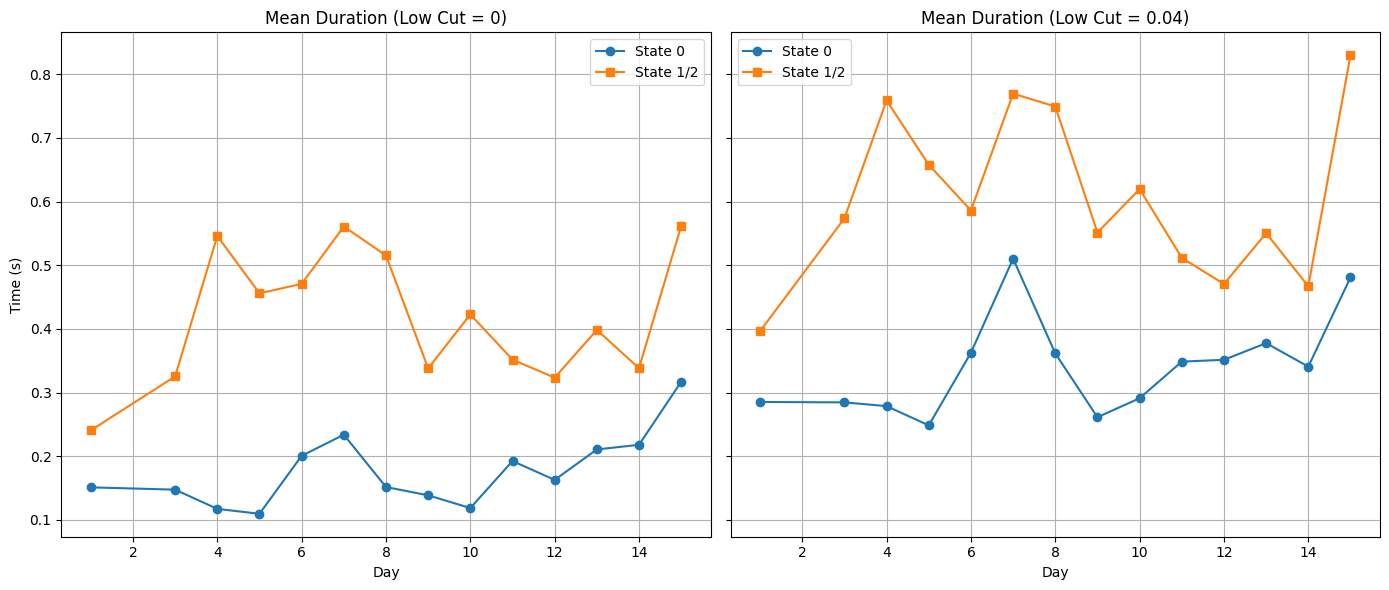

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
# import dl  # 共通セルでインポート済みのdlモジュールを使用

# ==========================================
# 1. 定数・変数定義
# ==========================================
MOUSE_ID = "VG1GC-66"
NUM_DAYS = 15
THRESHOLD_UPPER = 3.0
LOW_CUTS = [0, 0.04]  # 比較する下限閾値のパターン

summary_data = []

# ==========================================
# 2. データ読み込みと集計
# ==========================================
for day in range(1, NUM_DAYS + 1):
    dir_name = f"task-day{day}"

    try:
        # データ読み込み
        df = dl.load_trials_csv(MOUSE_ID, dir_name)

        # 前処理: 上限閾値でのフィルタリング (共通)
        df = df[df['diff_value'] < THRESHOLD_UPPER]

        # 日ごとの結果格納用辞書
        day_result = {'day': day}

        # --- パターン1: Low Cut = 0 ---
        df_cut0 = df[df['diff_value'] >= 0]
        # State 0
        day_result['s0_cut0'] = df_cut0[df_cut0['state_task'] == 0]['diff_value'].mean()
        # State 1/2
        day_result['s12_cut0'] = df_cut0[df_cut0['state_task'].isin([1, 2])]['diff_value'].mean()

        # --- パターン2: Low Cut = 0.04 ---
        df_cut04 = df[df['diff_value'] >= 0.04]
        # State 0
        day_result['s0_cut004'] = df_cut04[df_cut04['state_task'] == 0]['diff_value'].mean()
        # State 1/2
        day_result['s12_cut004'] = df_cut04[df_cut04['state_task'].isin([1, 2])]['diff_value'].mean()

        summary_data.append(day_result)

    except Exception as e:
        print(f"Day {day}: Error - {e}")

# DataFrame化
df_summary = pd.DataFrame(summary_data)

# ==========================================
# 3. 可視化 (2つのパターンを左右に並べて表示)
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 左図: Low Cut = 0
ax0 = axes[0]
ax0.plot(df_summary['day'], df_summary['s0_cut0'], marker='o', label='State 0')
ax0.plot(df_summary['day'], df_summary['s12_cut0'], marker='s', label='State 1/2')
ax0.set_title('Mean Duration (Low Cut = 0)')
ax0.set_xlabel('Day')
ax0.set_ylabel('Time (s)')
ax0.legend()
ax0.grid(True)

# 右図: Low Cut = 0.04
ax1 = axes[1]
ax1.plot(df_summary['day'], df_summary['s0_cut004'], marker='o', label='State 0')
ax1.plot(df_summary['day'], df_summary['s12_cut004'], marker='s', label='State 1/2')
ax1.set_title('Mean Duration (Low Cut = 0.04)')
ax1.set_xlabel('Day')
ax1.legend()
ax1.grid(True)

plt.tight_layout()
plt.show()

Processing VG1GC-48...
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day1/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day2/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day3/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day4/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day5/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day6/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day7/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day8/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day9/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day10/trials_L1L2.csv
CSVファイルが見つかりません: /content/drive/MyDrive/hackathon_data/VG1GC-48/task-day11/t

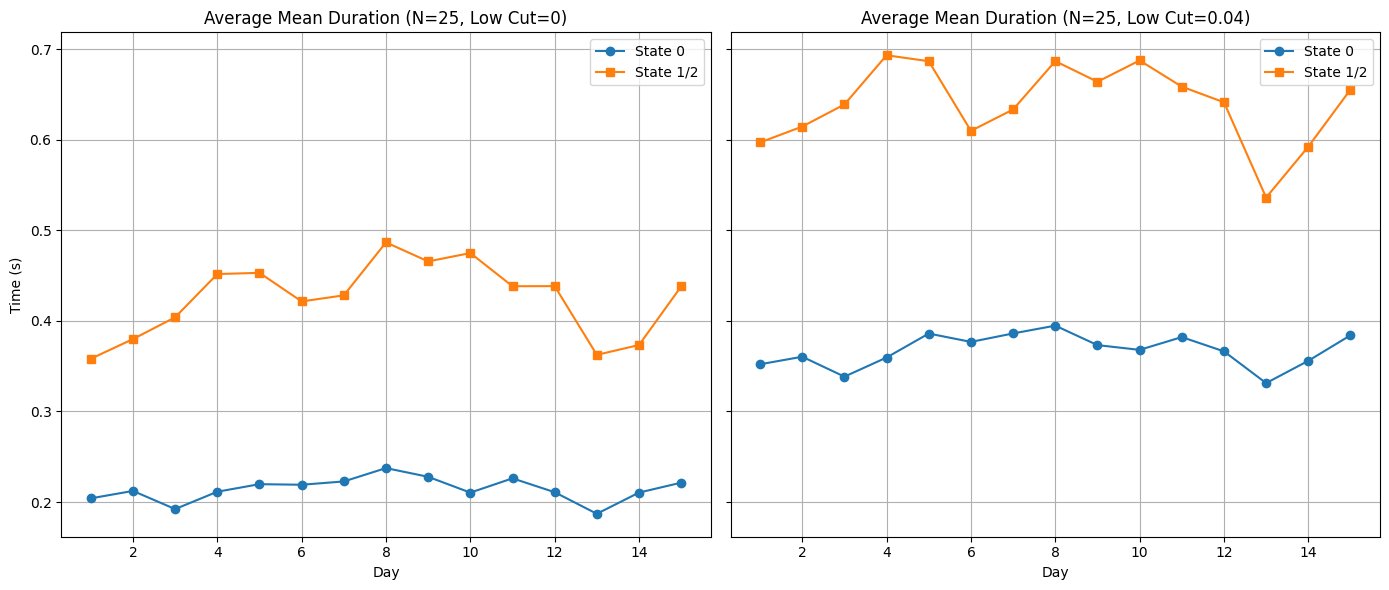

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import dl  # 共通セルでインポート済みのdlモジュールを使用

# ==========================================
# 1. 定数・変数定義
# ==========================================
# 対象のマウス番号リスト
MOUSE_NUMBERS = [
    48, 51, 52, 53, 54, 60, 61, 63, 66, 73,
    78, 85, 87, 99, 105, 109, 116, 117, 119,
    122, 124, 125, 127, 129, 130
]

NUM_DAYS = 15
THRESHOLD_UPPER = 3.0

all_mice_data = []

# ==========================================
# 2. データ読み込みと集計 (全マウスループ)
# ==========================================
for num in MOUSE_NUMBERS:
    mouse_id = f"VG1GC-{num}" # ID形式を生成
    print(f"Processing {mouse_id}...")

    for day in range(1, NUM_DAYS + 1):
        dir_name = f"task-day{day}"

        try:
            # データ読み込み
            df = dl.load_trials_csv(mouse_id, dir_name)

            # 前処理: 上限閾値でのフィルタリング (共通)
            df = df[df['diff_value'] < THRESHOLD_UPPER]

            # 格納用辞書
            record = {
                'mouse_id': mouse_id,
                'day': day,
                's0_cut0': np.nan,
                's12_cut0': np.nan,
                's0_cut004': np.nan,
                's12_cut004': np.nan
            }

            # --- パターン1: Low Cut = 0 ---
            df_cut0 = df[df['diff_value'] >= 0]
            if not df_cut0.empty:
                # State 0
                s0_data = df_cut0[df_cut0['state_task'] == 0]['diff_value']
                if not s0_data.empty:
                    record['s0_cut0'] = s0_data.mean()

                # State 1/2
                s12_data = df_cut0[df_cut0['state_task'].isin([1, 2])]['diff_value']
                if not s12_data.empty:
                    record['s12_cut0'] = s12_data.mean()

            # --- パターン2: Low Cut = 0.04 ---
            df_cut04 = df[df['diff_value'] >= 0.04]
            if not df_cut04.empty:
                # State 0
                s0_data_04 = df_cut04[df_cut04['state_task'] == 0]['diff_value']
                if not s0_data_04.empty:
                    record['s0_cut004'] = s0_data_04.mean()

                # State 1/2
                s12_data_04 = df_cut04[df_cut04['state_task'].isin([1, 2])]['diff_value']
                if not s12_data_04.empty:
                    record['s12_cut004'] = s12_data_04.mean()

            all_mice_data.append(record)

        except Exception as e:
            # ファイルがない、または読み込みエラーの場合はスキップ（ログのみ出力）
            # print(f"  Day {day}: Skipped ({e})")
            pass

# DataFrame化
df_all = pd.DataFrame(all_mice_data)

# ==========================================
# 3. 全マウスの平均を算出
# ==========================================
# 日付(day)ごとにグループ化して平均をとる
df_mean = df_all.groupby('day')[['s0_cut0', 's12_cut0', 's0_cut004', 's12_cut004']].mean().reset_index()

# ==========================================
# 4. 可視化 (全マウス平均の推移)
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 左図: Low Cut = 0
ax0 = axes[0]
ax0.plot(df_mean['day'], df_mean['s0_cut0'], marker='o', label='State 0')
ax0.plot(df_mean['day'], df_mean['s12_cut0'], marker='s', label='State 1/2')
ax0.set_title(f'Average Mean Duration (N={len(MOUSE_NUMBERS)}, Low Cut=0)')
ax0.set_xlabel('Day')
ax0.set_ylabel('Time (s)')
ax0.legend()
ax0.grid(True)

# 右図: Low Cut = 0.04
ax1 = axes[1]
ax1.plot(df_mean['day'], df_mean['s0_cut004'], marker='o', label='State 0')
ax1.plot(df_mean['day'], df_mean['s12_cut004'], marker='s', label='State 1/2')
ax1.set_title(f'Average Mean Duration (N={len(MOUSE_NUMBERS)}, Low Cut=0.04)')
ax1.set_xlabel('Day')
ax1.legend()
ax1.grid(True)

plt.tight_layout()
plt.show()

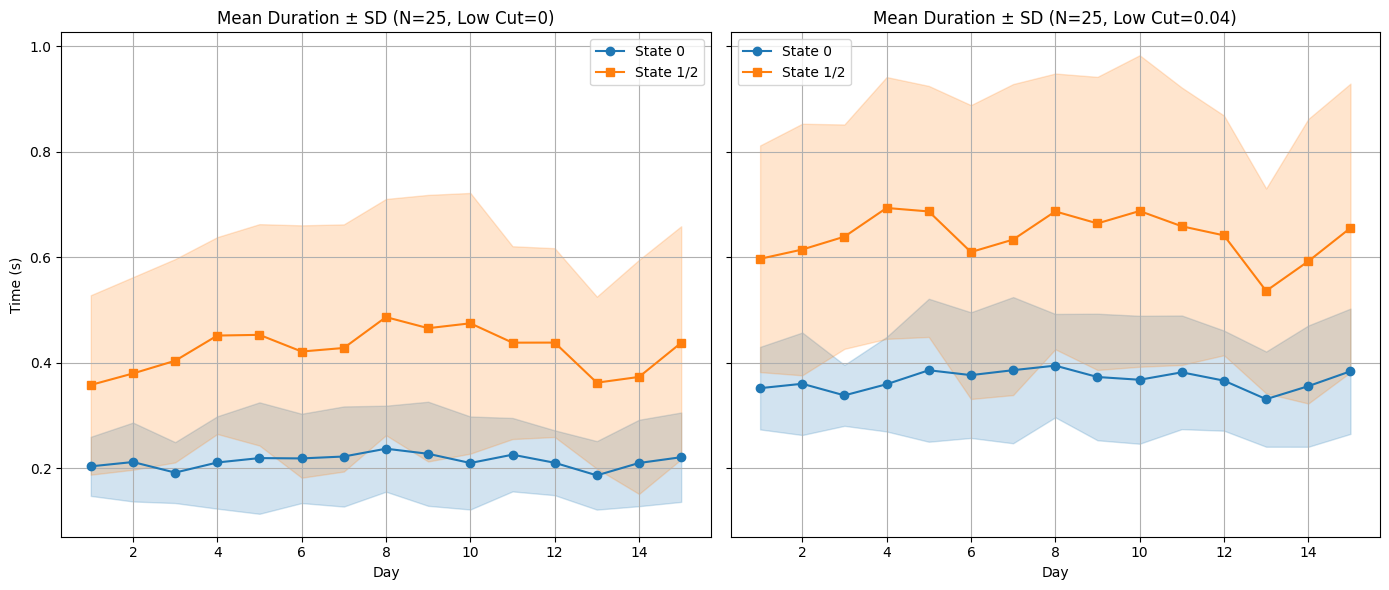

In [39]:
# ==========================================
# 3. 平均と標準偏差の算出
# ==========================================
# dayごとに mean(平均) と std(標準偏差) をまとめて算出
df_stats = df_all.groupby('day')[['s0_cut0', 's12_cut0', 's0_cut004', 's12_cut004']].agg(['mean', 'std'])

# ==========================================
# 4. 可視化 (標準偏差の帯付き)
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 描画用ヘルパー関数
def plot_with_band(ax, days, stats, col_name, label, color, marker):
    mean = stats[col_name]['mean']
    std = stats[col_name]['std']

    # メインのライン
    ax.plot(days, mean, marker=marker, label=label, color=color)
    # 標準偏差の帯 (mean ± std)
    ax.fill_between(days, mean - std, mean + std, color=color, alpha=0.2)

days = df_stats.index

# --- 左図: Low Cut = 0 ---
ax0 = axes[0]
plot_with_band(ax0, days, df_stats, 's0_cut0', 'State 0', 'tab:blue', 'o')
plot_with_band(ax0, days, df_stats, 's12_cut0', 'State 1/2', 'tab:orange', 's')

ax0.set_title(f'Mean Duration ± SD (N={len(MOUSE_NUMBERS)}, Low Cut=0)')
ax0.set_xlabel('Day')
ax0.set_ylabel('Time (s)')
ax0.legend()
ax0.grid(True)

# --- 右図: Low Cut = 0.04 ---
ax1 = axes[1]
plot_with_band(ax1, days, df_stats, 's0_cut004', 'State 0', 'tab:blue', 'o')
plot_with_band(ax1, days, df_stats, 's12_cut004', 'State 1/2', 'tab:orange', 's')

ax1.set_title(f'Mean Duration ± SD (N={len(MOUSE_NUMBERS)}, Low Cut=0.04)')
ax1.set_xlabel('Day')
ax1.legend()
ax1.grid(True)

plt.tight_layout()
plt.show()

フィルタリング後の試行数: 259


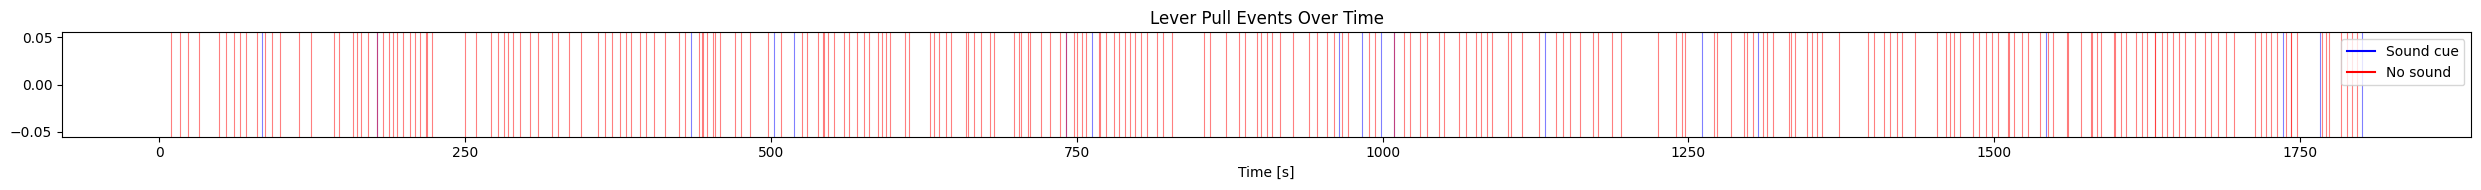

In [34]:
import matplotlib.pyplot as plt

# 条件に合致する行のフィルタリング
filtered_trials = trials[(trials['state_lever']==1) &
                         (trials['state_task'] == 0) &
                         (trials['diff_value'] > 0.4)].copy()
print("フィルタリング後の試行数:", len(filtered_trials))

# lever_time_nocueの算出：tからdiff_valueを引いた時刻
filtered_trials['lever_time_nocue'] = filtered_trials['t'] - filtered_trials['diff_value']

filtered = trials.dropna(subset=['trial_outcome'])
filtered = filtered[
    (filtered['first_diff'] > 1.0) &
    (filtered['reaction_time'] > 0.091) &
    (filtered['reaction_time'] < 0.361)
].copy()

# --- 時間データ ---
sound_onsets = filtered['pull_onset']
no_sound_onsets = filtered_trials['lever_time_nocue']

# --- プロット ---
plt.figure(figsize=(25, 2))

# 音あり：縦線（青）
for t in sound_onsets:
    plt.axvline(t, color='blue', alpha=0.5, linewidth=0.8)

# 音なし：縦線（赤）
for t in no_sound_onsets:
    plt.axvline(t, color='red', alpha=0.5, linewidth=0.8)

# 凡例用のダミー線
plt.plot([], [], color='blue', label='Sound cue')
plt.plot([], [], color='red', label='No sound')

# 軸とラベル
plt.xlabel('Time [s]')
plt.title('Lever Pull Events Over Time')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [36]:
session.trials.data

,start_time,stop_time,pull_onset,reaction_time,pull_duration_for_success,trial_outcome
0,14.884000,15.917200,NaN,NaN,0.2,failure
1,32.250801,32.517399,32.450802,0.2206,0.2,miss
2,41.150799,43.617401,41.417400,0.2722,0.2,success
3,47.584202,48.584202,48.517601,0.9456,0.2,miss
4,53.584202,53.950802,53.850800,0.2870,0.2,miss
...,...,...,...,...,...,...
158,1752.362427,1754.862427,1752.662354,0.3160,0.2,success
159,1759.162354,1761.795776,1759.595825,0.4436,0.2,success
160,1765.929199,1768.395752,1766.195801,0.2744,0.2,success
161,1792.162598,1792.429443,1792.395996,0.2336,0.2,miss


In [40]:
session.entries.metadata

,Name,Domain,Type,Unit,Description
0,tone,daq,Boolean,NaN,The pulses representing when the auditory cue ...
1,lever,daq,Analog,mm,The distance of the lever from its baseline po...
2,reward,daq,Boolean,NaN,The pulses used for reward delivery.
3,lick,daq,Boolean,NaN,The output of the lick sensor indicating when ...
4,lick_rate,daq,Analog,Hz,The lick rate calculated by applying an expone...
...,...,...,...,...,...
74,eyemedial,face_video,Analog,px,The inner corner of the right eye.
75,eyelateral,face_video,Analog,px,The outer corner of the right eye.
76,earroot,face_video,Analog,px,The most anterodorsal tip of the right ear root.
77,eartip,face_video,Analog,px,The most lateral point of the right ear helix.
